In [1]:
import os
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 16
})

#### Combine files

In [3]:
def combine_parts(methods=['RHFM', 'ZM', 'PZM'], parts='parts'):
    for method in methods:
        files = list(filter(lambda file: file.startswith(method), os.listdir(parts)))
        files = list(map(lambda file: parts+'/'+file, files))
        combined = pd.concat([pd.read_csv(f) for f in files ])
        combined.to_csv(method+'.csv', index=False)

In [4]:
combine_parts()

#### Prepare

In [5]:
def accumulate(data):
    A = {
        'MSE': [],
        'SNR': [],
        'PSNR': []
    }
    for L in range(0,129,8):
        means = data[data.L==L].mean()
        for field in A:
            val = means[field]
            A[field].append(val)# if val != math.inf else 0)
    return A

In [6]:
rhfm = accumulate(pd.read_csv('RHFM.csv'))
zm = accumulate(pd.read_csv('ZM.csv'))
pzm = accumulate(pd.read_csv('PZM.csv'))

No handles with labels found to put in legend.


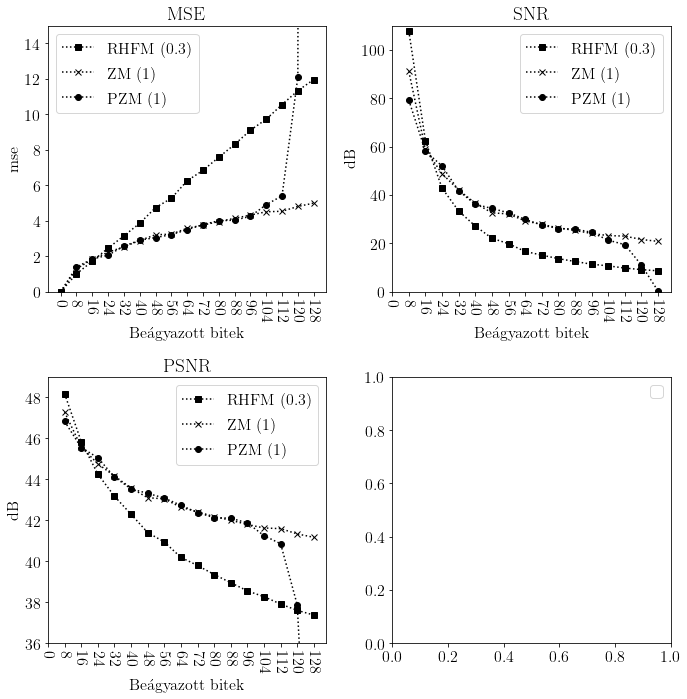

In [7]:
def plot_field(plt, ax, field, ylabel, ylim):
    global rhfm, zm, pzm
    ax.set_title(field)
    ax.plot(rhfm[field], 'k:s', label='RHFM (0.3)')
    ax.plot(zm[field], 'k:x', label='ZM (1)')
    ax.plot(pzm[field], 'k:o', label='PZM (1)')
    ax.set_xlabel('Beágyazott bitek')
    ax.set_ylabel(ylabel)
    ax.set_xticks(range(len(rhfm[field])))
    ax.set_xticklabels([ i for i in range(0,129,8) ])
    ax.set_ylim(ylim)
    plt.setp(ax.get_xticklabels(), rotation=270)
    ax.legend()

fig, axes = plt.subplots(2,2, figsize=(10,10))

plot_field(plt, axes[0,0], 'MSE', 'mse', (0,15))
plot_field(plt, axes[0,1], 'SNR', 'dB', (0,110))
plot_field(plt, axes[1,0], 'PSNR', 'dB', (36,49))

plt.legend()
plt.tight_layout()
plt.savefig('compare_distortion.png', dpi=300)
plt.show()